In [15]:
import uproot4
from matplotlib import pyplot as p
from hist import Hist
import hist
import awkward1 as ak
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.image as mpimg

# Pretty printing arrays
from pprint import pprint

In [16]:
cd /home/pipi/newyr/g4e/g4e-dev/examples

/home/pipi/newyr/g4e/g4e-dev/examples


In [17]:
ls

add_subdetector.py          g4e_output.root
beagle.mac                  g4e_simulation.py
blah                        hello_world_g4e.py
blehhh.pdf                  herwig.mac
build_g4e.py                my_root_instead_of_simple_run.bgn.rndm
check_overlaps.py           my_root_instead_of_simple_run.end.rndm
cone_particle_gun.bgn.rndm  my_root_instead_of_simple_run.geo.gdml
cone_particle_gun.end.rndm  my_root_instead_of_simple_run.geo.root
cone_particle_gun.geo.gdml  my_root_instead_of_simple_run.root
cone_particle_gun.geo.root  my_root_instead_of_simple_run.run.json
cone_particle_gun.mac       my_root_instead_of_simple_run.run.mac
cone_particle_gun.py        pythia.mac
cone_particle_gun.root      simple_run_jleic.py
cone_particle_gun.run.json  simple_run.py
cone_particle_gun.run.mac   test_run.bgn.rndm
cone_particle_gun_vis.py    test_run.end.rndm
event_display.bgn.rndm      test_run.geo.gdml
event_display.geo.gdml      test_run.geo.root
event_display.geo.root      test_run.root
event

In [21]:
file=uproot4.open("cone_particle_gun.root")

# To see all object names in the file:
file.items()

# only names: file.keys(), file.values()))

# To see items in subdirectories
# file.keys(recursive=True)

# There are more functions related to file:
# https://uproot.readthedocs.io/en/latest/uproot.reading.ReadOnlyFile.html

# Root directories:
# https://uproot.readthedocs.io/en/latest/uproot.reading.ReadOnlyDirectory.html

# To read multiple files at once (aka TChain)
# https://uproot.readthedocs.io/en/latest/basic.html#iterating-over-many-files

[('events;1', <TTree 'events' (65 branches) at 0x7fbfdf3294c0>)]

In [22]:
# File has a data tree called 'events'
# get events tree as a separate thing
tree = file["events"]

# Print number of entries
print(f"Number of entries: {tree.num_entries}")

#Uncomment this to see all values:
tree.show()


# More TBranch functions:
#https://uproot.readthedocs.io/en/latest/uproot.behaviors.TBranch.TBranch.html

Number of entries: 253
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
event_id             | uint64_t                 | AsDtype('>u8')
evt_true_q2          | double                   | AsDtype('>f8')
evt_true_x           | double                   | AsDtype('>f8')
evt_true_y           | double                   | AsDtype('>f8')
evt_true_w2          | double                   | AsDtype('>f8')
evt_true_nu          | double                   | AsDtype('>f8')
evt_true_t_hat       | double                   | AsDtype('>f8')
evt_has_dis_info     | int8_t                   | AsDtype('int8')
evt_weight           | double                   | AsDtype('>f8')
hit_count            | uint64_t                 | AsDtype('>u8')
hit_id               | std::vector<uint64_t>    | AsJagged(AsDtype('>u8'), he...
hit_trk_id           | std::vector<uint64_t>    | AsJagged(AsDtype('>u8'), he...
hi

In [77]:
# To load WHOLE data from a branch as an array:
hit_id = tree['hit_id'].array()
hit_x = tree['hit_x'].array()
hit_y = tree['hit_y'].array()
hit_z = tree['hit_z'].array()
hit_vol = tree['hit_vol_name'].array()



# library=np to return/convert array as a numpy library.

# print(hit_xyz)
# print(f"There are total: {len(hit_xyz['hit_x'])} hits records")

# 261
# [[...],[...], .... ]
iter=0

    


In [79]:

#for i in tree["hit_vol_name"].array():
    #print(i)
print(ak.num(hit_id))
print(ak.num(hit_z))
print(ak.num(hit_vol))

[90, 92, 300, 194, 152, 238, 183, 313, ... 174, 106, 135, 169, 160, 215, 277, 155]
[90, 92, 300, 194, 152, 238, 183, 313, ... 174, 106, 135, 169, 160, 215, 277, 155]
[90, 92, 300, 194, 152, 238, 183, 313, ... 174, 106, 135, 169, 160, 215, 277, 155]


In [83]:
hit_zcb=hit_z.mask[hit_vol=='cb_EMCAL_GVol_Phys']
hit_xcb=hit_x.mask[hit_vol=='cb_EMCAL_GVol_Phys']
hit_ycb=hit_y.mask[hit_vol=='cb_EMCAL_GVol_Phys']

ak.num(hittry)

<Array [90, 92, 300, 194, ... 215, 277, 155] type='253 * int64'>

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7fbf39e09a30>, cbar=<matplotlib.colorbar.Colorbar object at 0x7fbf39df0ac0>)

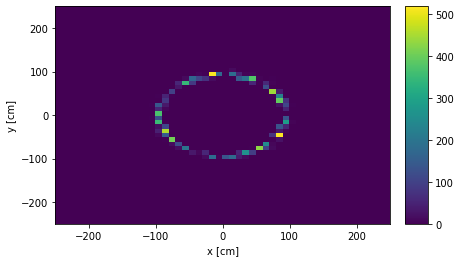

In [84]:
h = Hist(
    hist.axis.Regular(50, -250, 250, name="X", label="x [cm]", flow=False),
    hist.axis.Regular(50, -250, 250, name="Y", label="y [cm]", flow=False),
)

h.fill(ak.to_numpy(ak.flatten(hit_xcb/10)),
       ak.to_numpy(ak.flatten(hit_ycb/10)))
h.plot()

In [89]:
hit_zci=hit_z.mask[hit_vol=='ffi_ZDC']
hit_xci=hit_x.mask[hit_vol=='ffi_ZDC']
hit_yci=hit_y.mask[hit_vol=='ffi_ZDC']

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7fbf39b9c040>, cbar=<matplotlib.colorbar.Colorbar object at 0x7fbf39b9c430>)

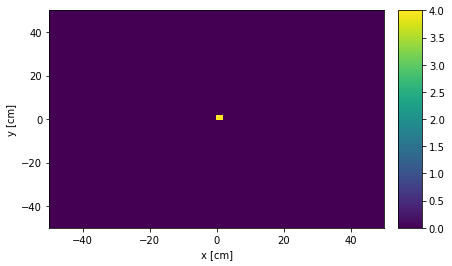

In [90]:
h = Hist(
    hist.axis.Regular(50, -50, 50, name="X", label="x [cm]", flow=False),
    hist.axis.Regular(50, -50, 50, name="Y", label="y [cm]", flow=False),
)

h.fill(ak.to_numpy(ak.flatten(hit_xci/10)),
       ak.to_numpy(ak.flatten(hit_yci/10)))
h.plot()